# 01 — Exploración Inicial de Datos (EDA)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.mode.copy_on_write = True

sns.set_style('whitegrid')
SEED = 42

## 1. Carga del dataset

In [2]:
df = pd.read_csv('src/data_sample/churn.csv')
df.shape

(10000, 14)

In [3]:
df.columns.tolist

<bound method IndexOpsMixin.tolist of Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')>

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.info()
print()
print('Estadísticas descriptivas:')
df.describe().T.round(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB

Estadísticas descriptivas:


,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5000.50,2886.90,1.00,2500.75,5000.50,7500.25,10000.00
CustomerId,10000.0,15690940.57,71936.19,15565701.00,15628528.25,15690738.00,15753233.75,15815690.00
CreditScore,10000.0,650.53,96.65,350.00,584.00,652.00,718.00,850.00
Age,10000.0,38.92,10.49,18.00,32.00,37.00,44.00,92.00
Tenure,10000.0,5.01,2.89,0.00,3.00,5.00,7.00,10.00
Balance,10000.0,76485.89,62397.41,0.00,0.00,97198.54,127644.24,250898.09
NumOfProducts,10000.0,1.53,0.58,1.00,1.00,1.00,2.00,4.00
HasCrCard,10000.0,0.71,0.46,0.00,0.00,1.00,1.00,1.00
IsActiveMember,10000.0,0.52,0.50,0.00,0.00,1.00,1.00,1.00
EstimatedSalary,10000.0,100090.24,57510.49,11.58,51002.11,100193.92,149388.25,199992.48


### Primeras observaciones
- **10.000 registros** y **14 columnas**
- RowNumber, CustomerId, Surname → identificadores sin valor predictivo → se pueden eliminar
- Sin nulos aparentes 
- HasCrCard e IsActiveMember son binarias (0/1) aunque aparecen como numéricas

## 2. Análisis del Target

Distribución del target en TRAIN:
Exited
0    6370
1    1630
Name: count, dtype: int64

Exited
0    79.6
1    20.4
Name: proportion, dtype: float64


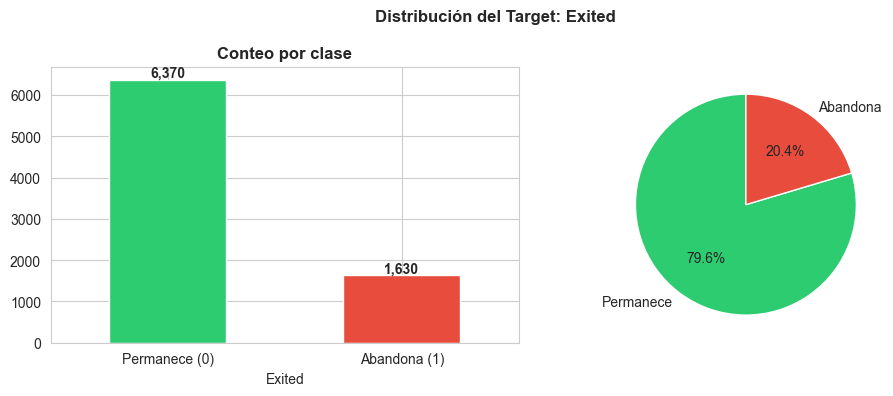

In [7]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['RowNumber','CustomerId','Surname','Exited'])
y = df['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED, stratify=y)

print('Distribución del target en TRAIN:')
print(y_train.value_counts())
print()
print(y_train.value_counts(normalize=True).round(3)*100)

fig, axes = plt.subplots(1,2,figsize=(10,4))
y_train.value_counts().plot(kind='bar', ax=axes[0],
    color=['#2ecc71','#e74c3c'], edgecolor='white', rot=0)
axes[0].set_title('Conteo por clase', fontweight='bold')
axes[0].set_xticklabels(['Permanece (0)','Abandona (1)'])
for p in axes[0].patches:
    axes[0].annotate(f'{int(p.get_height()):,}',
        (p.get_x()+p.get_width()/2, p.get_height()), ha='center', va='bottom', fontweight='bold')

y_train.value_counts().plot(kind='pie', ax=axes[1],
    labels=['Permanece','Abandona'], autopct='%1.1f%%',
    colors=['#2ecc71','#e74c3c'], startangle=90)
axes[1].set_ylabel('')
plt.suptitle('Distribución del Target: Exited', fontweight='bold')
plt.tight_layout()
plt.show()

### análisis del target
El dataset está **desbalanceado**: aproximadamente **80% permanece** y **20% abandona**.

Esto condiciona lo que haremos después:
-  NO usaremos **accuracy** → un modelo que prediga siempre "permanece" tendría 80% sin aprender nada
-  Usaremos **ROC-AUC** → robusta al desbalanceo
-  `stratify=y` en el split → misma proporción en train y test  ya aplicado
-  `class_weight='balanced'` en los modelos → más atención a los clientes que se van

## 3. Análisis de Missings y Tipos

In [8]:
nulos = X_train.isnull().sum()
print('Nulos en train:')
print(nulos[nulos > 0] if nulos.sum() > 0 else 'Ninguno ')
print()
num_cols = X_train.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = X_train.select_dtypes(include='object').columns.tolist()
print(f'Variables numéricas ({len(num_cols)}): {num_cols}')
print(f'Variables categóricas ({len(cat_cols)}): {cat_cols}')
print()
print('Cardinalidad de categóricas:')
for col in cat_cols:
    print(f'  {col}: {X_train[col].nunique()} valores únicos → {X_train[col].unique()}')

Nulos en train:
Ninguno 

Variables numéricas (8): ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
Variables categóricas (2): ['Geography', 'Gender']

Cardinalidad de categóricas:
  Geography: 3 valores únicos → ['France' 'Germany' 'Spain']
  Gender: 2 valores únicos → ['Male' 'Female']


### Analisis nulos y tipos
- **Sin nulos** en ninguna variable  — imputación preventiva por si acaso
- Las variables categóricas tienen **cardinalidad baja** (2-3 categorías) → One-Hot Encoding es suficiente
- `HasCrCard` e `IsActiveMember` son numéricas binarias — no necesitan encoding

## 4. Análisis Univariante — Variables Numéricas

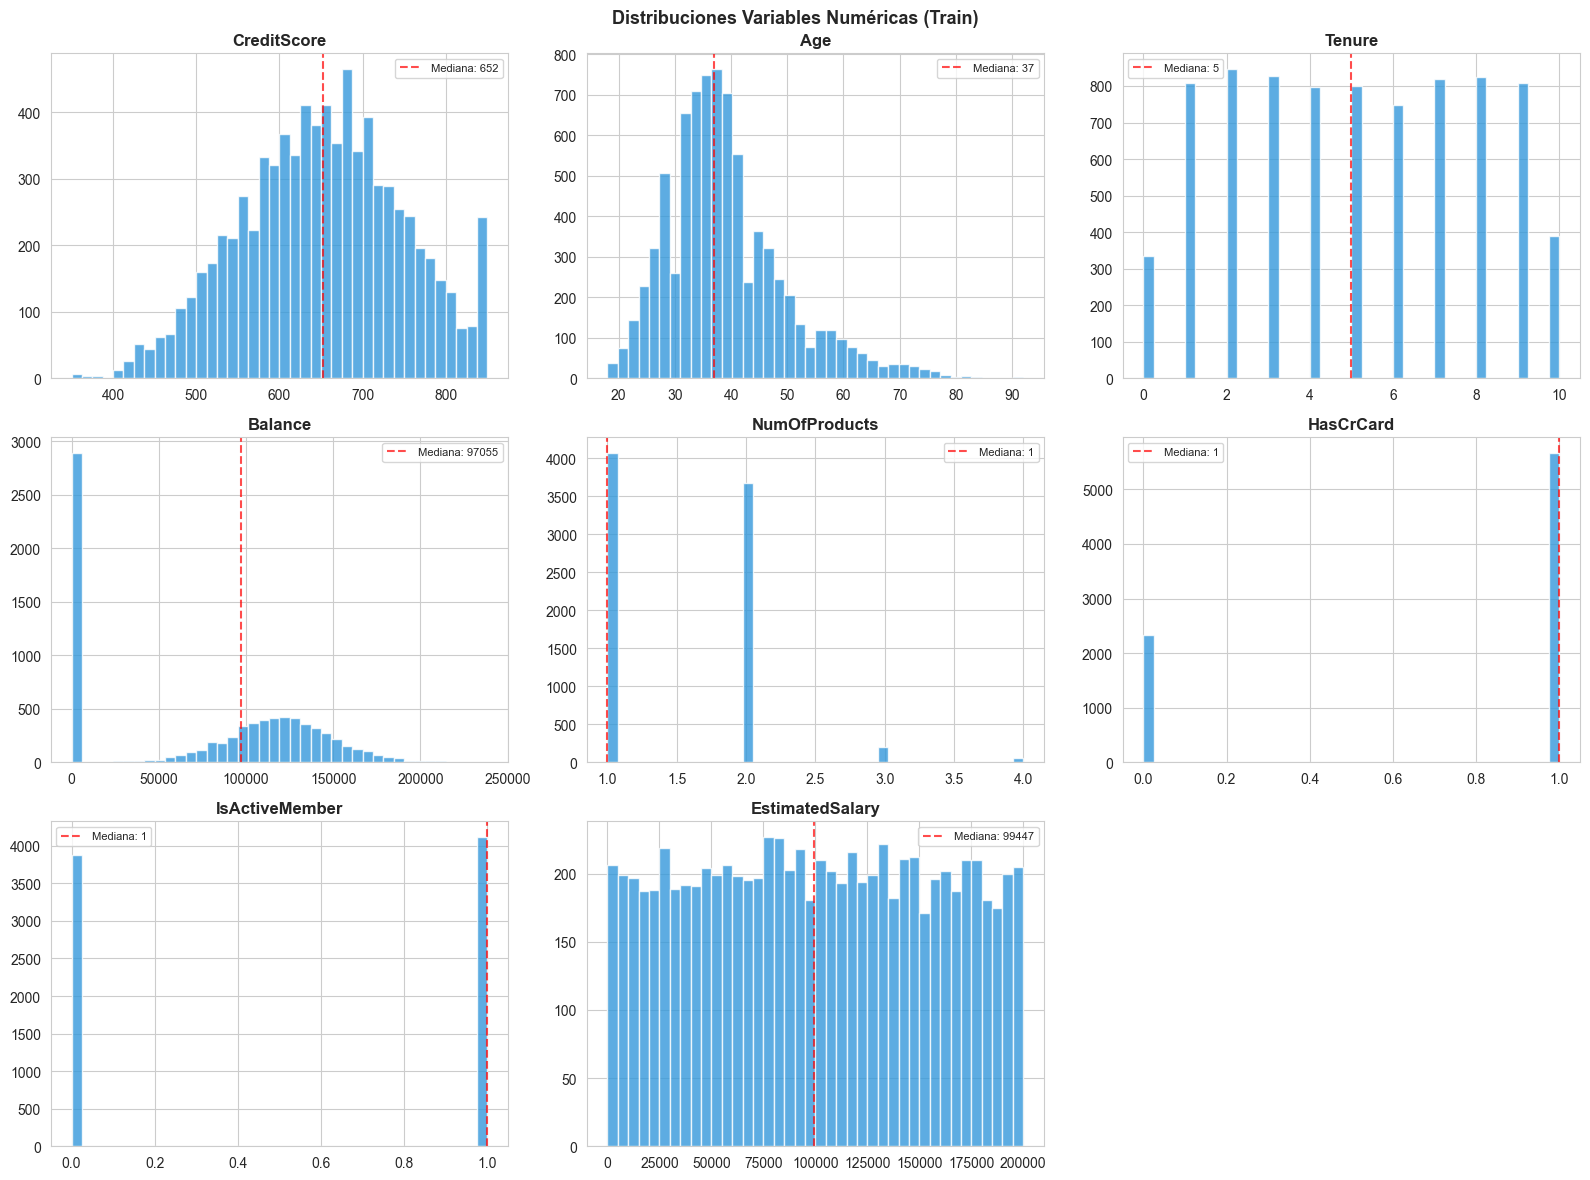

In [9]:
n_cols_grid = 3
n_rows_grid = -(-len(num_cols) // n_cols_grid)
fig, axes = plt.subplots(n_rows_grid, n_cols_grid, figsize=(16, n_rows_grid*4))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    axes[i].hist(X_train[col].dropna(), bins=40, color='#3498db', edgecolor='white', alpha=0.8)
    axes[i].set_title(col, fontweight='bold')
    mediana = X_train[col].median()
    axes[i].axvline(mediana, color='red', linestyle='--', alpha=0.7, label=f'Mediana: {mediana:.0f}')
    axes[i].legend(fontsize=8)

for j in range(len(num_cols), len(axes)):
    axes[j].set_visible(False)

plt.suptitle('Distribuciones Variables Numéricas (Train)', fontsize=13, fontweight='bold')
plt.tight_layout()
plt.show()

In [10]:
# Detección de outliers con IQR
print('Análisis de outliers por variable:')
for col in num_cols:
    Q1, Q3 = X_train[col].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    n_out = ((X_train[col] < Q1-1.5*IQR) | (X_train[col] > Q3+1.5*IQR)).sum()
    pct = n_out/len(X_train)*100
    flag = ' Tratar' if pct > 1 else ' OK'
    print(f'  {col:20s}: {n_out:4d} outliers ({pct:.1f}%)  {flag}')

Análisis de outliers por variable:
  CreditScore         :   14 outliers (0.2%)   OK
  Age                 :  298 outliers (3.7%)   Tratar
  Tenure              :    0 outliers (0.0%)   OK
  Balance             :    0 outliers (0.0%)   OK
  NumOfProducts       :   50 outliers (0.6%)   OK
  HasCrCard           :    0 outliers (0.0%)   OK
  IsActiveMember      :    0 outliers (0.0%)   OK
  EstimatedSalary     :    0 outliers (0.0%)   OK


###  análisis univariante numérico

| Variable | Observación | Acción decidida |
|---|---|---|
| `Age` | Distribución sesgada, valores > 70 | Capping P1-P99 |
| `Balance` | Distribución bimodal — muchos con 0 | Patrón real, conservar |
| `CreditScore` | Distribución normal 300-900 | Sin acción necesaria |
| `EstimatedSalary` | Distribución uniforme | Sin acción necesaria |
| `NumOfProducts` | Mayoría 1-2, muy pocos 3-4 | Capping por outliers |

> **¿Por qué capping y no eliminar?** En producción el banco recibirá clientes con cualquier valor.
> El capping garantiza que siempre haya un valor dentro del rango aprendido en train.

## 5. Análisis Univariante — Variables Categóricas

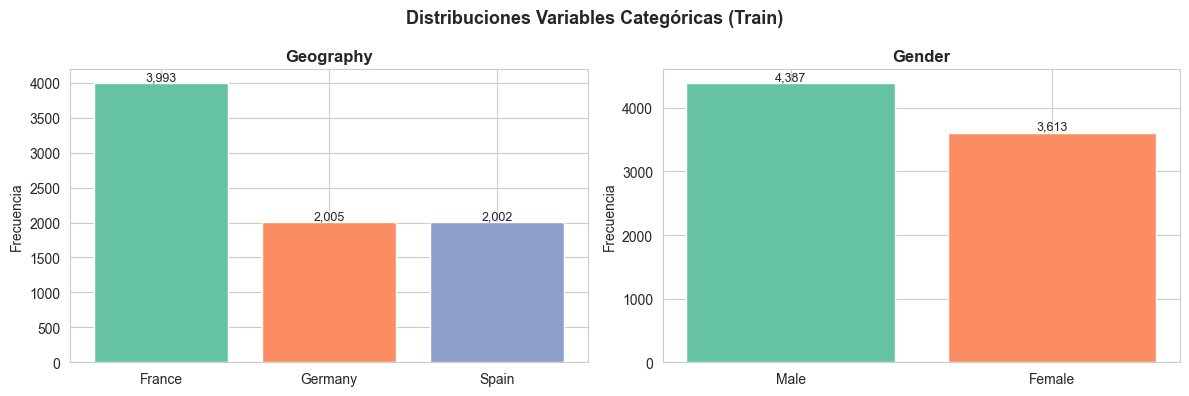

In [11]:
fig, axes = plt.subplots(1, len(cat_cols), figsize=(12, 4))
if len(cat_cols) == 1:
    axes = [axes]
palette = sns.color_palette('Set2', 8)

for i, col in enumerate(cat_cols):
    counts = X_train[col].value_counts()
    axes[i].bar(counts.index, counts.values, color=palette[:len(counts)], edgecolor='white')
    axes[i].set_title(col, fontweight='bold')
    axes[i].set_ylabel('Frecuencia')
    for p in axes[i].patches:
        axes[i].annotate(f'{int(p.get_height()):,}',
            (p.get_x()+p.get_width()/2, p.get_height()), ha='center', va='bottom', fontsize=9)

plt.suptitle('Distribuciones Variables Categóricas (Train)', fontsize=13, fontweight='bold')
plt.tight_layout()
plt.show()

###  Conclusiones del análisis univariante categórico
- **`Geography`**: Francia ~50%, Alemania y España ~25% cada una
- **`Gender`**: distribución equilibrada (~55% Male / ~45% Female)
- Cardinalidad baja en ambas → **One-Hot Encoding** con `drop_first=True`

## 6. Análisis Bivariante — Variables vs Target

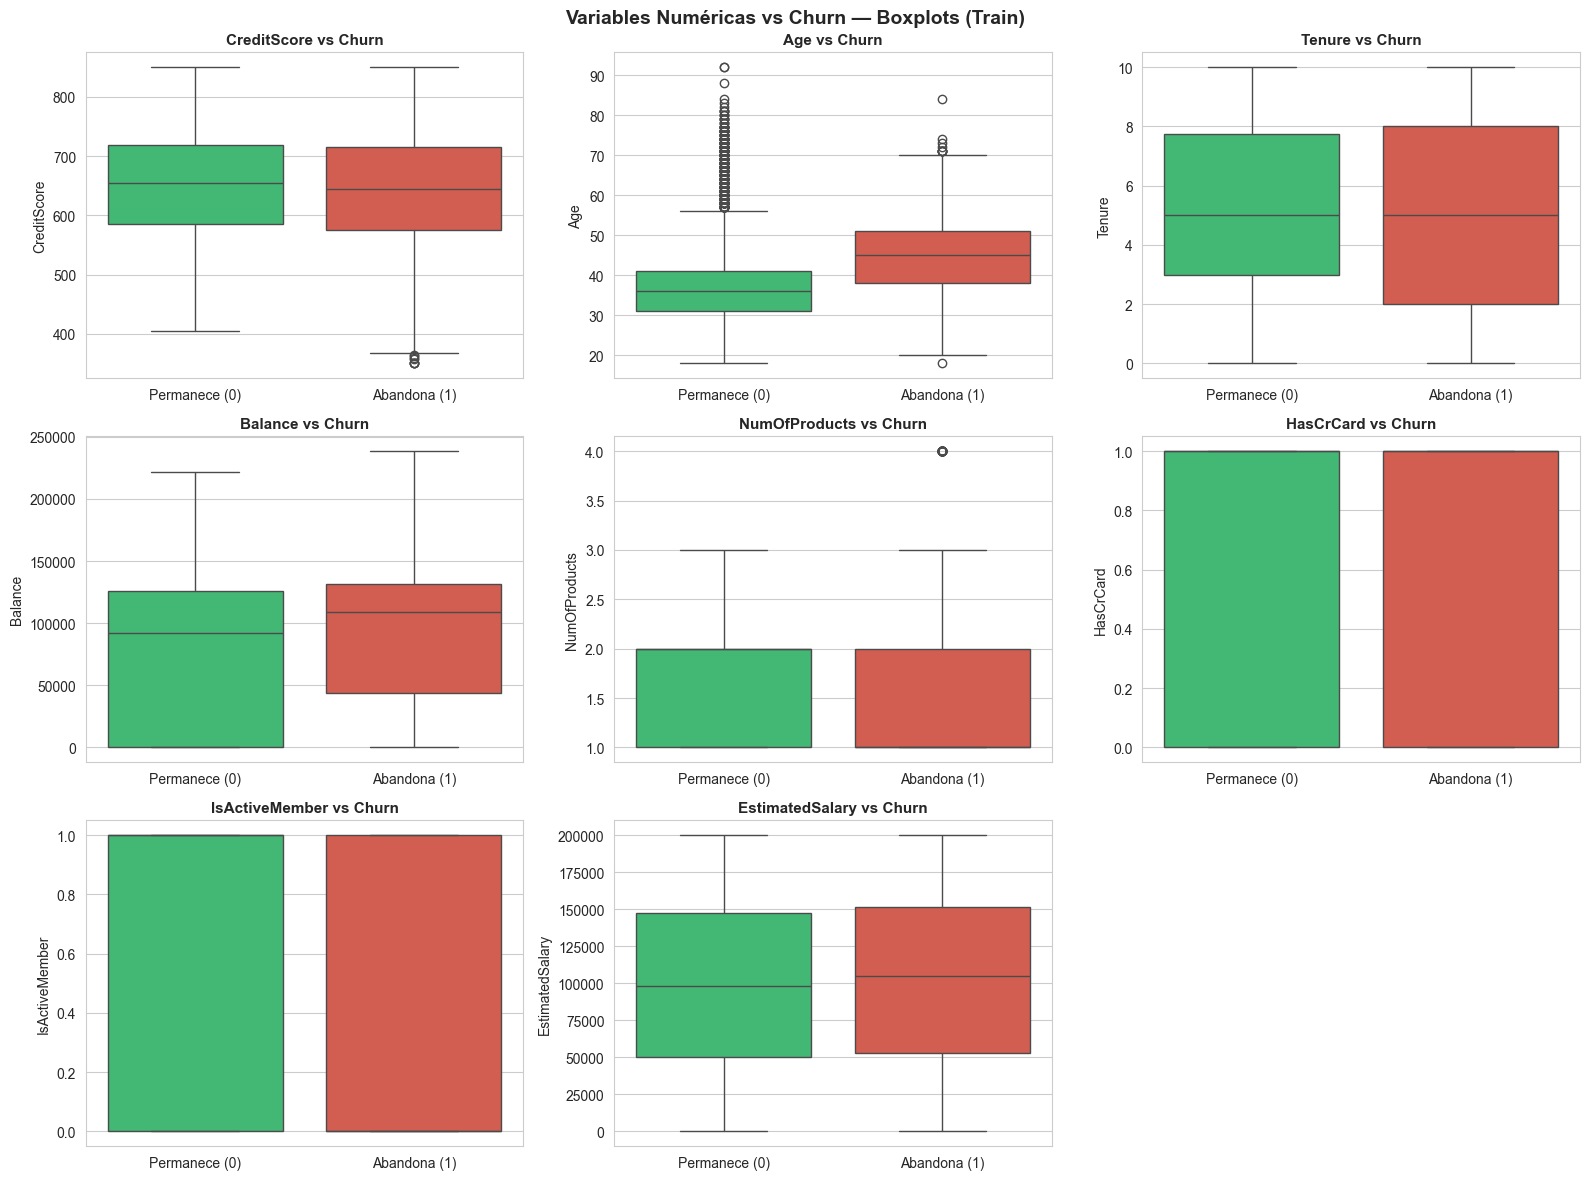

In [13]:
train_eda = X_train.copy()
train_eda['Exited'] = y_train.values
train_eda_plot = train_eda.copy()
train_eda_plot['Exited'] = train_eda_plot['Exited'].astype(str)
palette_target = {'0':'#2ecc71','1':'#e74c3c'}

n_cols_grid = 3
n_rows_grid = -(-len(num_cols) // n_cols_grid)
fig, axes = plt.subplots(n_rows_grid, n_cols_grid, figsize=(16, n_rows_grid*4))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.boxplot(data=train_eda_plot, x='Exited', y=col,
                hue='Exited', palette=palette_target,
                ax=axes[i], order=['0','1'], legend=False)
    axes[i].set_title(f'{col} vs Churn', fontsize=11, fontweight='bold')
    axes[i].set_xticks([0,1])
    axes[i].set_xticklabels(['Permanece (0)','Abandona (1)'])
    axes[i].set_xlabel('')

for j in range(len(num_cols), len(axes)):
    axes[j].set_visible(False)

plt.suptitle('Variables Numéricas vs Churn — Boxplots (Train)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

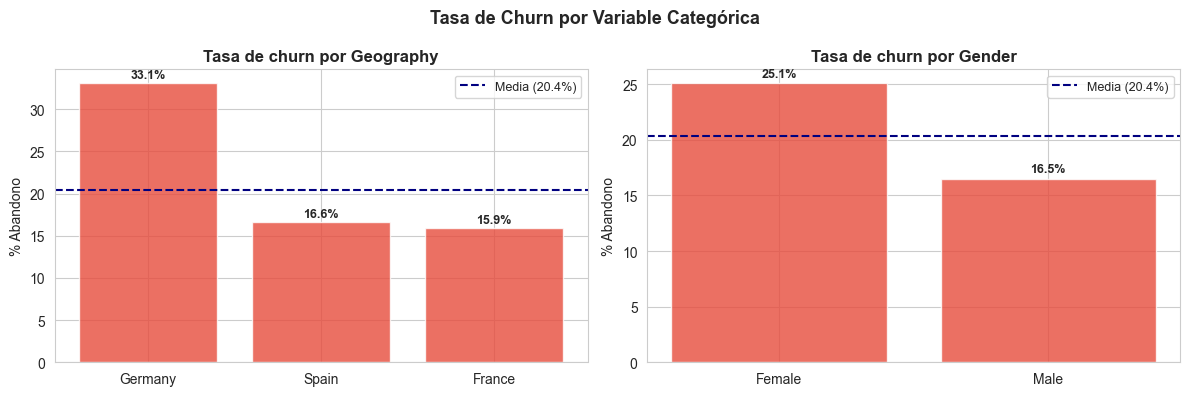

In [14]:
# Tasa de churn por variable categórica
media_global = train_eda['Exited'].mean()*100
fig, axes = plt.subplots(1, len(cat_cols), figsize=(12,4))
if len(cat_cols)==1: axes=[axes]

for i, col in enumerate(cat_cols):
    tasa = train_eda.groupby(col)['Exited'].mean().sort_values(ascending=False)*100
    bars = axes[i].bar(tasa.index, tasa.values, color='#e74c3c', alpha=0.8, edgecolor='white')
    axes[i].axhline(media_global, color='navy', linestyle='--', label=f'Media ({media_global:.1f}%)')
    axes[i].set_title(f'Tasa de churn por {col}', fontweight='bold')
    axes[i].set_ylabel('% Abandono')
    axes[i].legend(fontsize=9)
    for bar in bars:
        axes[i].text(bar.get_x()+bar.get_width()/2, bar.get_height()+0.3,
                     f'{bar.get_height():.1f}%', ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.suptitle('Tasa de Churn por Variable Categórica', fontsize=13, fontweight='bold')
plt.tight_layout()
plt.show()

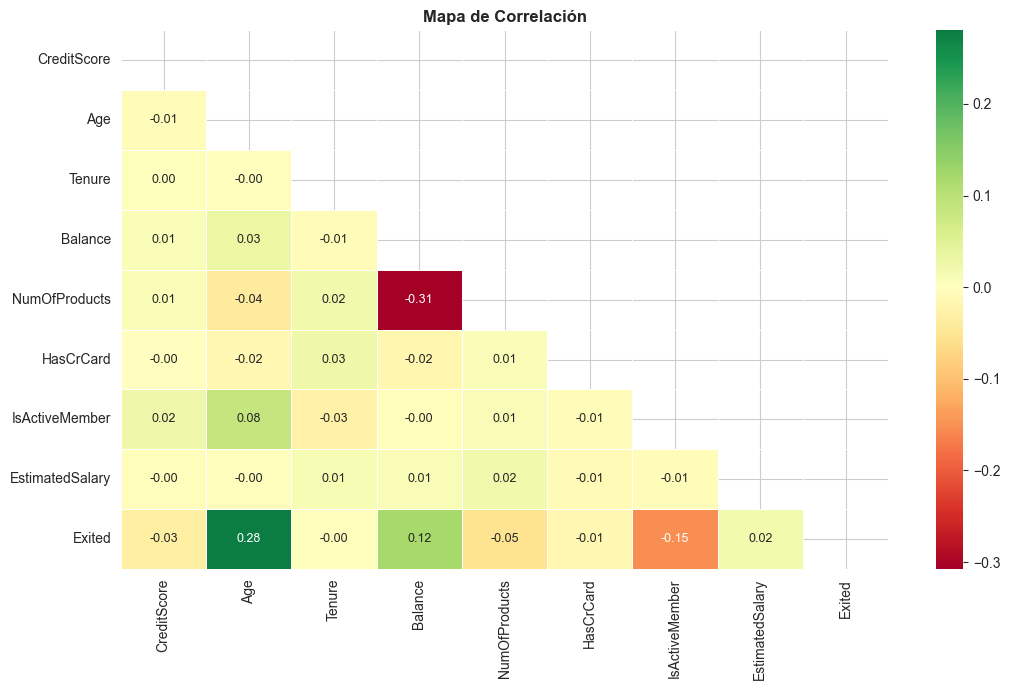


Correlaciones con Exited (ordenadas):
  Age                 : 0.2804   Alta
  IsActiveMember      : 0.1523   Alta
  Balance             : 0.1214   Media
  NumOfProducts       : 0.0545   Media
  CreditScore         : 0.0340  ➖ Baja
  EstimatedSalary     : 0.0203  ➖ Baja
  HasCrCard           : 0.0145  ➖ Baja
  Tenure              : 0.0024  ➖ Baja


In [15]:
# Mapa de correlaciones
plt.figure(figsize=(11,7))
corr = train_eda[num_cols+['Exited']].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, fmt='.2f', cmap='RdYlGn',
            center=0, linewidths=0.5, annot_kws={'size':9})
plt.title('Mapa de Correlación', fontweight='bold')
plt.tight_layout()
plt.show()

print('\nCorrelaciones con Exited (ordenadas):')
corr_target = corr['Exited'].drop('Exited').abs().sort_values(ascending=False)
for var, val in corr_target.items():
    nivel = ' Alta' if val > 0.15 else (' Media' if val > 0.05 else '➖ Baja')
    print(f'  {var:20s}: {val:.4f}  {nivel}')

### Conclusiones del análisis bivariante

| Variable | Hallazgo | Interpretación |
|---|---|---|
| `Age`  | Los que se van son **notablemente más mayores** | Clientes maduros buscan mejores condiciones |
| `Balance`  | Los que se van tienen **saldos más altos** | Paradójico — tienen más con qué moverse |
| `NumOfProducts` | 3-4 productos → tasa de churn **muy alta** | Sobrecontratación genera insatisfacción |
| `IsActiveMember` | Inactivos abandonan **el doble** | Inactividad = señal de desenganche |
| `Geography` | Alemania tiene churn **muy superior** | Diferencias de competencia por mercado |
| `Gender` | Mujeres abandonan algo más | Diferencia moderada |

**nueva feature:** `balance_per_product` = Balance / NumOfProducts
→ Captura la concentración de dinero por producto — cuanto más concentrado, más fácil captarlo la competencia

## 7. Resumen de Decisiones para el Preprocesado

Tras el EDA, estas son las conclusiones que llevamos al notebook de preprocesado:

- **Desbalanceo:** ~80/20 → usar ROC-AUC, stratify y class_weight
- **Nulos:** ninguno — imputación preventiva con mediana/moda
- **Outliers:** `Age`, `Balance`, `NumOfProducts` → capping P1-P99
- **Variables más predictivas:** `Age`, `Balance`, `IsActiveMember`, `NumOfProducts`, `Geography`
- **Crear nueva feature:** `balance_per_product`
- **Categóricas:** cardinalidad baja → One-Hot Encoding es suficiente
- **Eliminar:** `RowNumber`, `CustomerId`, `Surname`